---

# **Part I: Research Question**

## Research Question

My data set for this data mining exercise includes data on a telco company’s current and former subscribers, with an emphasis on customer churn (whether customers are maintaining or discontinuing their subscription to service).  Data analysis performed on the dataset will be aimed with this research question in mind: how many principal components does the data set contain when using the continuous numerical data in the data set as input?  Continuous numerical data will include numerical data which includes a measurable variable, rather than numerical data used as a label.

---

## Objectives and Goals

Conclusions gleaned from the analysis of this data can benefit stakeholders by revealing information on how far the dimensionality of this data set might be reduced.  Such information may be used to both reduce the feature set and potentially identify variables that exhibit covariance, indicating they may be related.  My goal will be to determine how many principal compenents the continuous data contains, as well as the explained variance of each principal component.

---

# **Part II: Method Justification**

## Principal Component Analysis

Principal Component Analysis, or "PCA", is an unsupervised learning technique.  It utilizes only continuous data and does not take into consideration any target variables.  It is primarily a dimensionality reduction technique.  It uses a covariance matrix to identify highly correlated features and represent those features as a smaller number of uncorrelated features.  The algorithm continues this correlation reduction in an attempt to identify directions of maximum variance in the original data and projecting them onto a reduced dimensional dimensional space.  The resulting components are called "principal components" (Pramoditha, 2020).  

PCA assumes that there exists a correlation between the features in a data set.  PCA will not be able to determine any principal components in a data set within which no correlation between features is present (Keboola, 2022).

The expected outcome will be a low number of principal components (which satisfy the Kaiser criterion) to which this original group of continuous variables can be reduced while still maintaining the correlation and variance characteristics of the original data.

---

# **Part III: Data Preparation**

## Data Preparation Goals and Data Manipulations

I would like my data to include only variables relevant to my research question, and to be clean and free of missing values and duplicate rows.  PCA can only operate on continuous variables, so my first goal in data preparation is to make sure the data I will be working with contains no categorical data.


A list of the variables I will be using for my analysis is included below, along with their variable types and a brief description of each.

* Population - **continuous** - *Population within a mile radius of customer*
* Children - **continuous** - *Number of children in customer’s household*
* Age - **continuous** - *Age of customer*
* Income - **continuous** - *Annual income of customer*
* Outage_sec_perweek - **continuous** - *Average number of seconds per week of system outages in the customer’s neighborhood*
* Email - **continuous** - *Number of emails sent to the customer in the last year*
* Contacts - **continuous** - *Number of times customer contacted technical support*
* Yearly_equip_failure - **continuous** - *The number of times customer’s equipment failed and had to be reset/replaced in the past year*
* Tenure - **continuous** - *Number of months the customer has stayed with the provider*
* MonthlyCharge - **continuous** - *The amount charged to the customer monthly*
* Bandwidth_GB_Year - **continuous** - *The average amount of data used, in GB, in a year by the customer*
* Item1: Timely response - **continuous** - *survey response - scale of 1 to 8 (1 = most important, 8 = least important)*
* Item2: Timely fixes - **continuous** - *survey response - scale of 1 to 8 (1 = most important, 8 = least important)*
* Item3: Timely replacements - **continuous** - *survey response - scale of 1 to 8 (1 = most important, 8 = least important)*
* Item4: Reliability - **continuous** - *survey response - scale of 1 to 8 (1 = most important, 8 = least important)*
* Item5: Options - **continuous** - *survey response - scale of 1 to 8 (1 = most important, 8 = least important)*
* Item6: Respectful response - **continuous** - *survey response - scale of 1 to 8 (1 = most important, 8 = least important)*
* Item7: Courteous exchange - **continuous** - *survey response - scale of 1 to 8 (1 = most important, 8 = least important)*
* Item8: Evidence of active listening - **continuous** - *survey response - scale of 1 to 8 (1 = most important, 8 = least important)*

---


My first steps will be to import the complete data set and execute functions that will give me information on its size and the data types of its variables.  I will then narrow the data set to a new dataframe containing only the variables I am concerned with, and then utilize functions to determine if any null values or duplicate rows exist.  By using the index_col parameter in my import I utilize CaseOrder, the data set's natural index column, as the index column in my pandas dataframe.

In [1]:
# Imports and housekeeping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Import the main dataset
df = pd.read_csv('churn_clean.csv', dtype={'locationid':np.int64}, index_col=[0])

In [3]:
# Display data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
# Display data frame top 5 rows
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
# Trim data frame to variables relevant to research question
columns = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
           'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 
           'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
df_data = pd.DataFrame(df[columns])
# Store the data frame in variable 'X'
X = df_data

In [6]:
# Check data for null or missing values
df_data.isna().any()

Population              False
Children                False
Age                     False
Income                  False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Tenure                  False
MonthlyCharge           False
Bandwidth_GB_Year       False
Item1                   False
Item2                   False
Item3                   False
Item4                   False
Item5                   False
Item6                   False
Item7                   False
Item8                   False
dtype: bool

In [7]:
# Check data for duplicated rows
df_data.duplicated().sum()

0

In [8]:
# Display new data frame top 5 rows
df_data.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,
1,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


---

## Summary Statistics

I can use the describe() function to display the summary statistics for the entire dataframe, as well as each variable I'll be evaluating for inclusion in the PCA exercise.

In [9]:
# Display summary statistics for entire data frame
df_data.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


---

## Further Preparation Steps

I will use the StandardScaler function to scale my variables for more accurate feature weighting.  StandardScaler transforms each variable value to have a mean of 0 and a variance of 1.  Once done, every variable value will fall between -1 and 1, and the data set values can be considered "standardized".  The standardized data set is then assigned to variable "X_scaled".

In [10]:
# Scaling continuous variables with StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.transform(X)

---

## Copy of Prepared Data Set

Below is the code used to export the prepared data set to CSV format.

In [11]:
df_prepared = pd.DataFrame(X_scaled, columns=df_data.columns)
# Export prepared dataframe to csv
df_prepared.to_csv(r'C:\Users\wstul\d212\churn_clean_prepared.csv')

---

# **Part IV: Analysis**

## Matrix of All Principal Components

To begin performing my PCA analysis of the data I instantiated a PCA model using the number of features in the original data set.  The model is then fitted to the scaled data.  The scaled data is then transformed using the PCA model and rendered as numbered principal components (PC1, PC2, etc.).  A loadings matrix is then generated, displaying a weight value for each data set feature in each principal component.

In [12]:
pca = PCA(n_components = X.shape[1])
pca.fit(X_scaled)

PCA(n_components=19)

In [13]:
df_matrix = pd.DataFrame(pca.transform(X_scaled), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 
                                                            'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 
                                                            'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 
                                                            'PC18', 'PC19'])

In [14]:
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 
                                                            'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 
                                                            'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 
                                                            'PC18', 'PC19'], index = df_prepared.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Population,-0.002109,-0.005463,0.014732,-0.292151,0.264958,0.402355,0.355864,0.329128,0.161654,0.580378,0.167295,0.229022,-0.057130,0.019142,-0.016176,0.001210,-0.005661,-0.002356,-0.000322
Children,0.004072,0.015862,0.028393,0.510569,0.345310,-0.089376,0.119069,0.226847,0.155912,-0.175953,0.655599,-0.241974,0.017020,-0.012250,-0.014011,0.014490,0.020915,-0.000948,-0.021615
Age,0.006459,0.000294,-0.029319,-0.455297,-0.417933,0.183902,0.152752,-0.024113,0.346066,-0.180481,0.234748,-0.590829,-0.045336,0.002513,-0.002495,-0.009405,0.005784,0.013696,0.022421
Income,0.001038,0.006035,0.025865,0.252065,-0.285030,-0.084983,-0.429611,0.581477,0.449649,0.219833,-0.252659,-0.057674,-0.020484,-0.079018,-0.007573,-0.002561,0.005301,0.013466,-0.000910
Outage_sec_perweek,-0.017516,0.003927,-0.014363,-0.220115,0.339482,-0.591284,0.273527,0.262607,-0.149557,0.125521,-0.319263,-0.439536,-0.089844,0.016926,-0.008716,0.013529,0.018262,0.013516,0.000361
Email,0.008744,-0.020609,-0.003459,-0.190450,0.519450,0.319498,-0.103117,0.170129,0.290785,-0.592268,-0.328652,0.061145,0.061158,-0.017175,-0.016342,0.006449,-0.017253,0.000961,0.000226
Contacts,-0.008761,0.003318,-0.011853,-0.420731,-0.124577,-0.146366,-0.275202,0.508824,-0.434373,-0.248703,0.371468,0.241548,0.044032,-0.035285,-0.003279,-0.026498,0.020255,-0.000813,-0.000948
Yearly_equip_failure,-0.007688,0.017604,0.008199,0.167516,-0.373155,-0.147092,0.686465,0.241921,0.114547,-0.334113,-0.146136,0.365394,0.020739,0.006446,-0.015853,-0.001308,0.007488,-0.021448,-0.000145
Tenure,-0.016320,0.702323,-0.063085,-0.005355,-0.007568,0.048576,0.000016,0.007554,-0.028780,-0.001590,-0.028600,-0.027147,0.005940,-0.003507,0.006548,-0.007773,-0.004625,0.007519,-0.705251
MonthlyCharge,0.000930,0.039858,-0.009499,-0.298690,0.113921,-0.537631,-0.112559,-0.284655,0.562547,0.029519,0.228176,0.375187,-0.005920,0.014551,-0.016508,-0.000068,0.021494,-0.012007,-0.045778


---

## Kaiser Criterion

I will use the Kaiser rule to determine which principal components are most important.  The Kaiser rule works by calculating an eigenvalue for each principal component.  An eigenvalue of 1.0 indicates that a principal component is as releveant as an individual variable from the data set, so principal components that rise above the eigenvalue of 1.0 are considered better.

These eigenvalues can be visualized using a scree plot, making it easy to determine visually how many key principal components were discovered by PCA.

In [15]:
cov_matrix = np.dot(df_prepared.T, df_prepared) / X.shape[0]

In [16]:
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
eigenvalues

[2.9485673172848346,
 1.996911994408803,
 1.6365536031172965,
 1.0569148738277545,
 1.029893736468177,
 1.0192367682908854,
 1.004692279595719,
 0.9991972786161447,
 0.9915298714872935,
 0.9806403932632919,
 0.9644011257661943,
 0.9608777750015292,
 0.7786582754423637,
 0.6901350220375765,
 0.592279454452642,
 0.5377461931170225,
 0.4817273164763822,
 0.3245773347065548,
 0.005459386639422779]

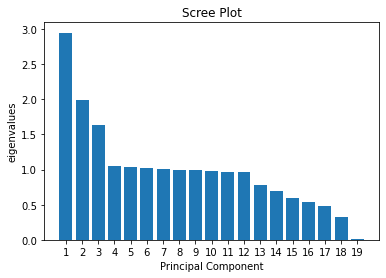

In [25]:
#The following code constructs the Scree plot
labels = [str(x) for x in range(1, len(eigenvalues)+1)]
 
plt.bar(x=range(1,len(eigenvalues)+1), height=eigenvalues, tick_label=labels)
plt.ylabel('eigenvalues')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

---

## Individual and Cumulative Variance

Based on the scree plot, the first three principal components are the most important.  Using the code below I have printed the explained variance of each of these principal components, as well as their total explained variance.  Explained variance is defined as a statistical measure of how much variation in a dataset can be attributed to each of the principal components generated by PCA (Kumar, 2022).

In [18]:
total_eigenvalues = sum(eigenvalues)
var_exp = [(i/total_eigenvalues) for i in sorted(eigenvalues, reverse=True)]
print("Explained Variance for PC1: " + str(var_exp[0]))
print("Explained Variance for PC2: " + str(var_exp[1]))
print("Explained Variance for PC3: " + str(var_exp[2]))

Explained Variance for PC1: 0.15518775354130804
Explained Variance for PC2: 0.10510063128467449
Explained Variance for PC3: 0.08613440016406877


In [19]:
cum_sum_exp = np.cumsum(var_exp)
print("Total Explained Variance for PC1, PC2 and PC3: " + str(cum_sum_exp[2]))

Total Explained Variance for PC1, PC2 and PC3: 0.3464227849900513


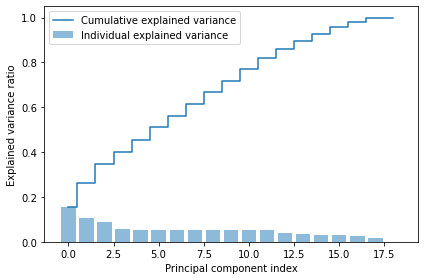

In [20]:
# Plot the explained variance against cumulative explained variance
#
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

---

## Results of Data Analysis

PCA determined there are 3 principal components when the 19 continuous variables of the data set were evaluated, answering the original research question "how many principal components does the data set contain when using the continuous numerical data in the data set as input?".  A graphical representation of the variables influencing each of these principal components is included below.

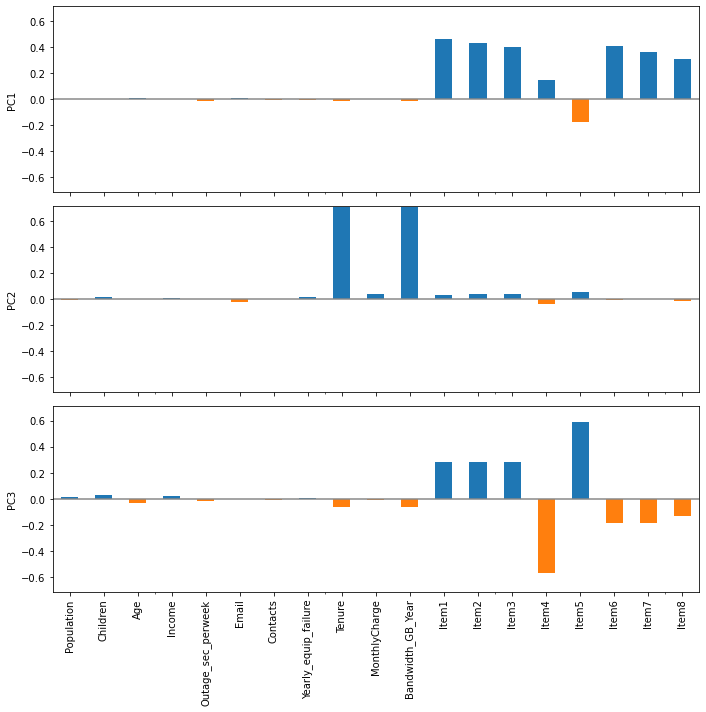

In [21]:
loadings_df = pd.DataFrame(pca.components_[0:3, :], 
                        columns=df_data.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings_df.loc[0:3, :])))
f, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings_df.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)
plt.tight_layout()
plt.show()

---

# **Web Sources**

https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py

https://vitalflux.com/pca-explained-variance-concept-python-example/

https://medium.com/analytics-vidhya/pca-and-how-to-interpret-it-with-python-8aa664f7a69a



---

# **References**


Keboola.  (2022, April 2).  *A Guide to Principal Component Analysis (PCA) for Machine Learning.*  https://www.keboola.com/blog/pca-machine-learning


Pramoditha, R.  (2020, August 3).  *Principal Component Analysis (PCA) with Scikit-learn.*  Towards Data Science.  https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0


Kumar, A.  (2022, August 11).  *PCA Explained Variance Concepts with Python Example.*  Data Analytics.  https://vitalflux.com/pca-explained-variance-concept-python-example/